In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Segmentation 

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Null values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
# Handling Null Values
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()),inplace = True)
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()),inplace = True)

<AxesSubplot:>

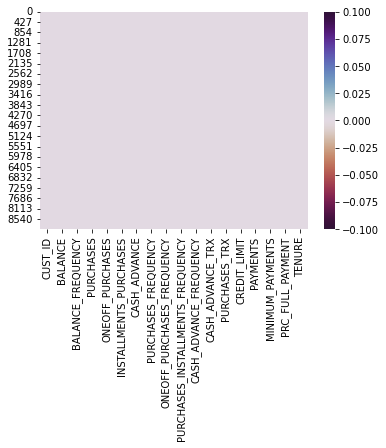

In [8]:
sns.heatmap(df.isnull(),cmap='twilight_shifted_r')

In [9]:
# Visualization
num_df = df.drop('CUST_ID',axis=1)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [10]:
# Tenure Distribution
ten_distr = num_df.groupby('TENURE').size().sort_values(ascending=False)
ten_distr


TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

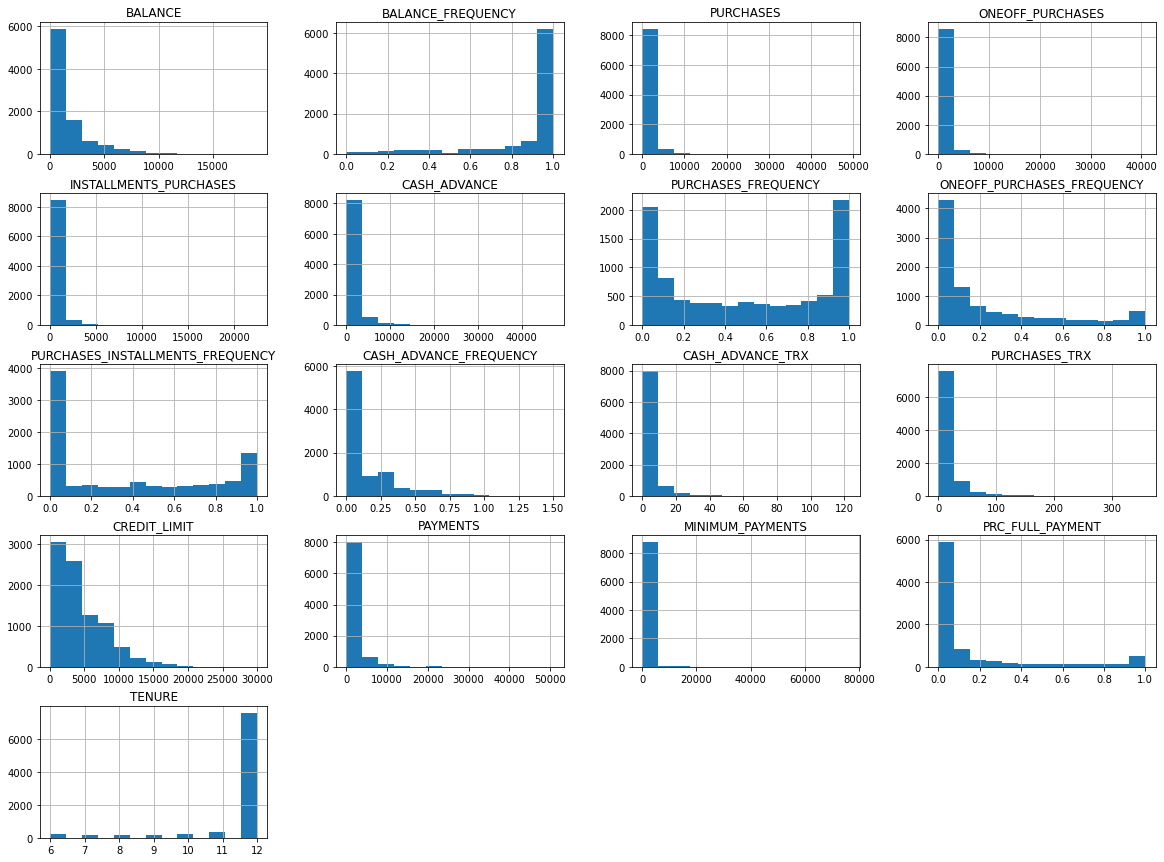

In [11]:
num_df.hist(bins=13,figsize=(20,15),layout=(5, 4));

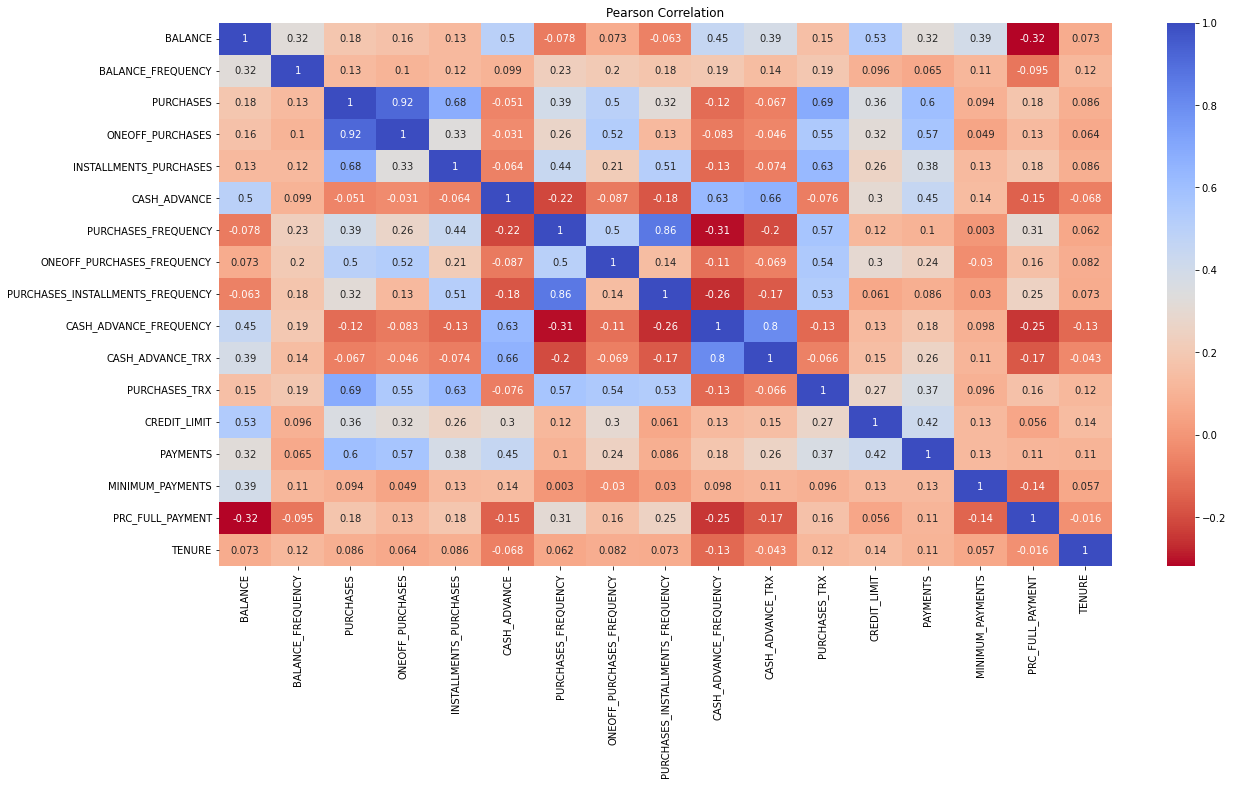

In [14]:
# Feature Correlation

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm_r')
plt.title('Pearson Correlation')
plt.show()

In [ ]:
# Realtion between Credit Limit and Balance

In [15]:
x = num_df.iloc[:,[12,0]]
x.head()

,CREDIT_LIMIT,BALANCE
0,1000.0,40.900749
1,7000.0,3202.467416
2,7500.0,2495.148862
3,7500.0,1666.670542
4,1200.0,817.714335


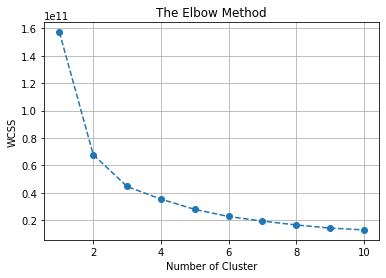

In [16]:
 
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'o--')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(x)
x = x.values

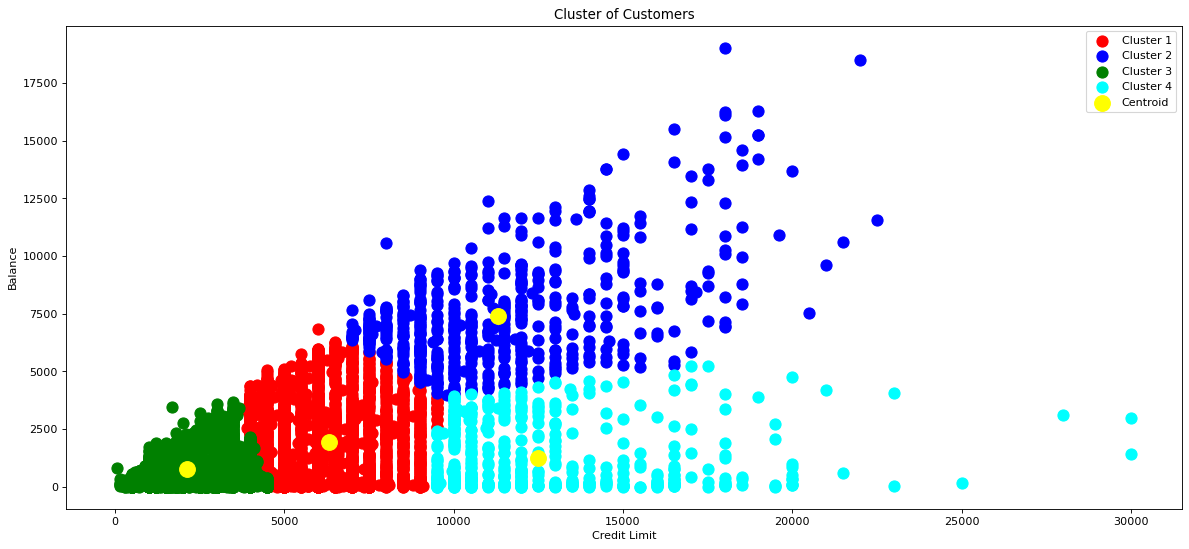

In [19]:
plt.figure(figsize = (18,8),dpi=80)
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100 , c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100 , c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100 , c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100 , c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',s=200, label='Centroid')

plt.title("Cluster of Customers")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.legend()
plt.show()


In [20]:
# Correlation Between Purchase and Payment
x = num_df.iloc[:,[2,13]]
x.head()

,PURCHASES,PAYMENTS
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


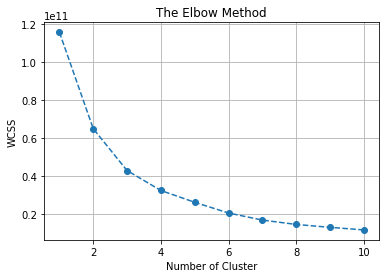

In [21]:
 
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'o--')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(x)
x = x.values

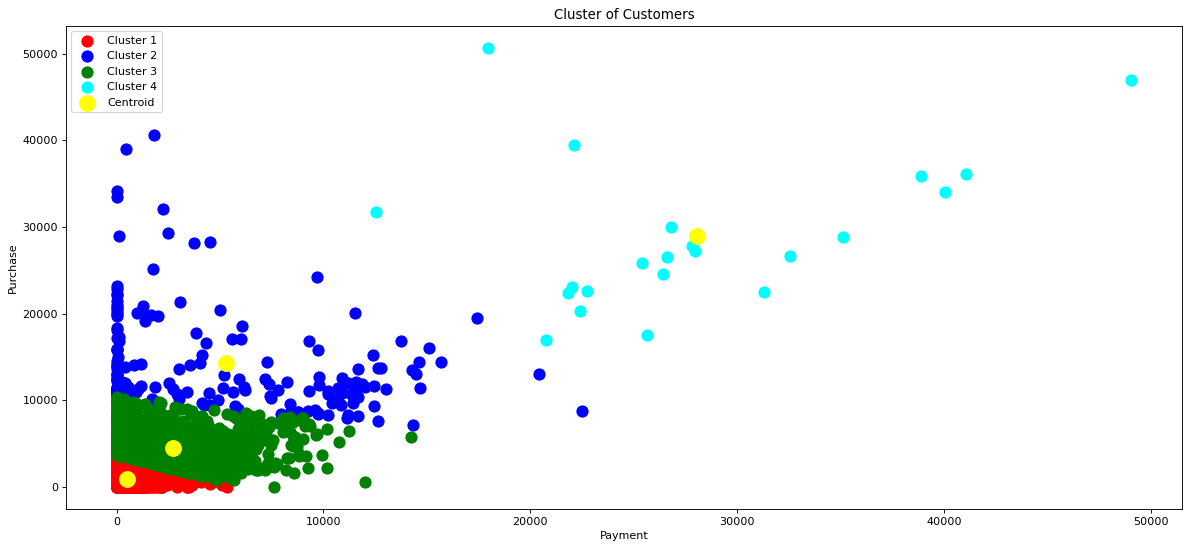

In [23]:
plt.figure(figsize = (18,8),dpi=80)
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100 , c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100 , c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100 , c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100 , c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',s=200, label='Centroid')

plt.title("Cluster of Customers")
plt.xlabel("Payment")
plt.ylabel("Purchase")
plt.legend()
plt.show()
